In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
train=pd.read_csv("/content/Titanic_train.csv")

In [40]:
test=pd.read_csv("/content/Titanic_test.csv")

In [41]:
train.head(),test.head()

(   PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name     Sex   Age  SibSp  \
 0                            Braund, Mr. Owen Harris    male  22.0      1   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                             Heikkinen, Miss. Laina  female  26.0      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                           Allen, Mr. William Henry    male  35.0      0   
 
    Parch            Ticket     Fare Cabin Embarked  
 0      0         A/5 21171   7.2500   NaN        S  
 1      0          PC 17599  71.2833   C85        C  
 2      0  STON/O2. 3101282   7.9250   NaN        S  
 3      0            113803  53.1000  C123        S  
 4      0            373450   8.0500

In [42]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


<Axes: >

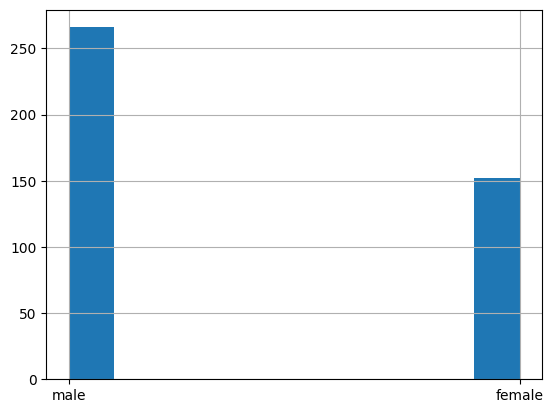

In [43]:
test['Sex'].hist()

<Axes: >

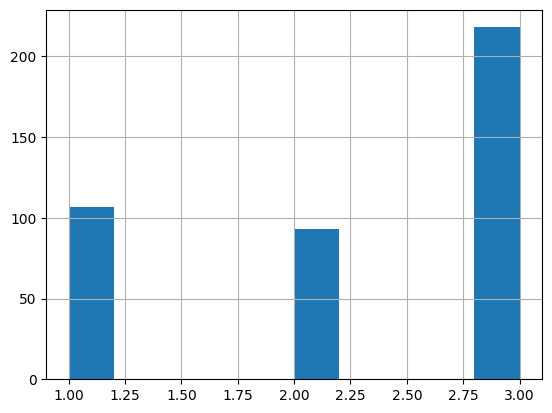

In [44]:
test['Pclass'].hist()

<Axes: >

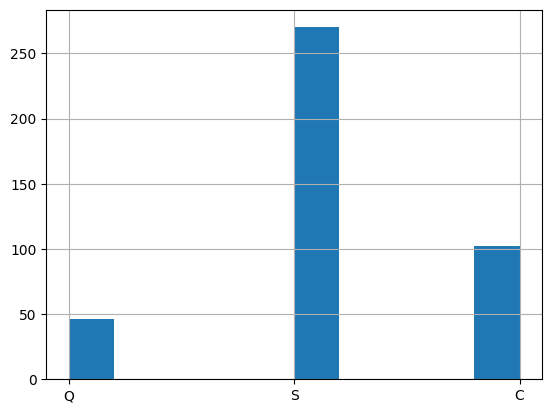

In [45]:
test['Embarked'].hist()

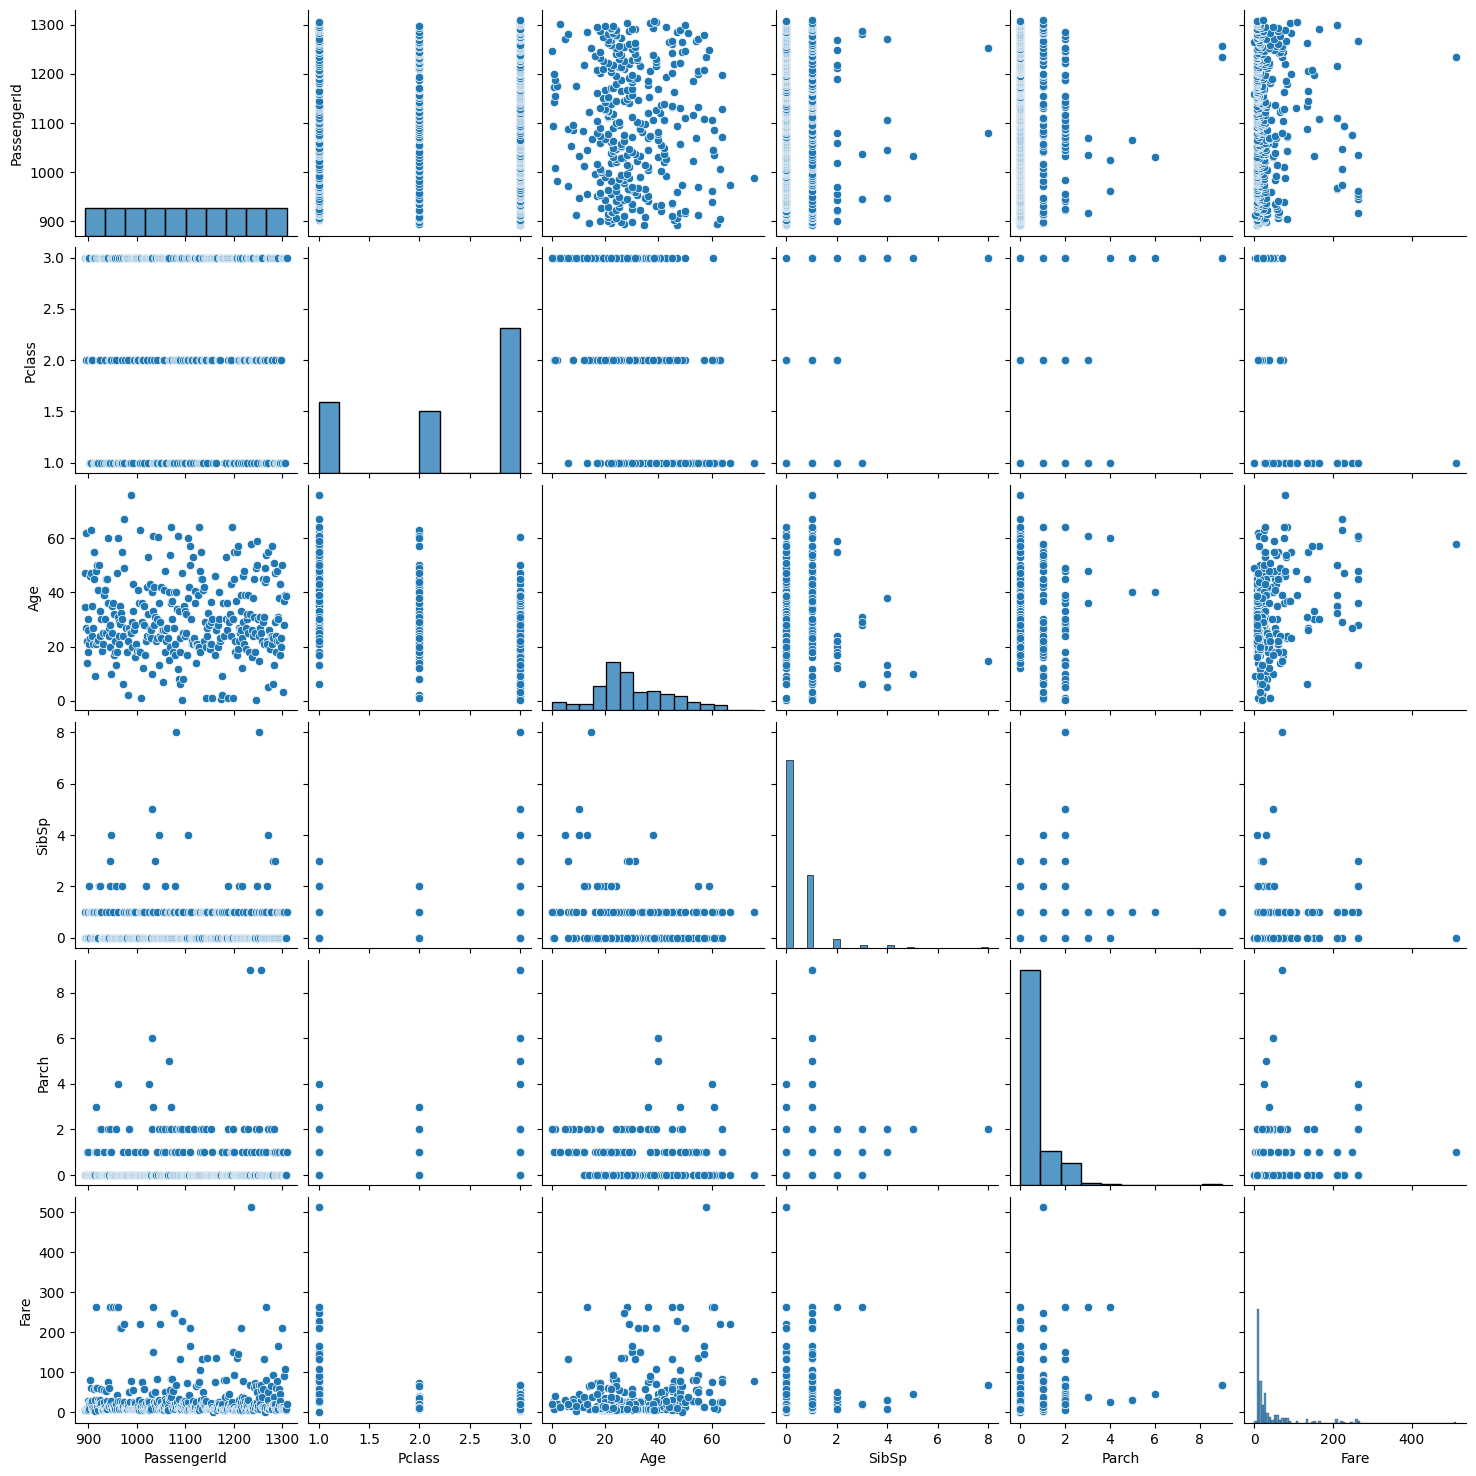

In [46]:
import seaborn as sns
sns.pairplot(test)

In [47]:
train['Dataset'] = 'train'
test['Dataset']  = 'test'


In [62]:
combined = pd.concat([train, test], ignore_index=True)
combined.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Dataset
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


In [63]:
combined['Age'] = combined['Age'].fillna(combined['Age'].median())
combined['Fare'] = combined['Fare'].fillna(combined['Fare'].median())
combined['Survived']=combined['Survived'].fillna(combined['Survived'].mode()[0])

In [64]:
combined = pd.get_dummies(combined, columns=['Sex','Embarked'], drop_first=True)


In [65]:
combined

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Dataset,Sex_male,Embarked_Q,Embarked_S
0,1,0.0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,train,True,False,True
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,train,False,False,False
2,3,1.0,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,train,False,False,True
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,train,False,False,True
4,5,0.0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,train,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0.0,3,"Spector, Mr. Woolf",28.0,0,0,A.5. 3236,8.0500,NaN,test,True,False,True
1305,1306,0.0,1,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,C105,test,False,False,False
1306,1307,0.0,3,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,test,True,False,True
1307,1308,0.0,3,"Ware, Mr. Frederick",28.0,0,0,359309,8.0500,NaN,test,True,False,True


In [66]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   float64
 9   Cabin        295 non-null    object 
 10  Dataset      1309 non-null   object 
 11  Sex_male     1309 non-null   bool   
 12  Embarked_Q   1309 non-null   bool   
 13  Embarked_S   1309 non-null   bool   
dtypes: bool(3), float64(3), int64(4), object(4)
memory usage: 116.5+ KB


In [67]:
combined.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,1014


In [68]:
combined.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

In [70]:
outlier_combined={}
for col in combined.select_dtypes(include=np.number).columns:
  Q1=combined[col].quantile(0.25)
  Q3=combined[col].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  outlier_combined[col]=combined[(combined[col]<lower_bound)|(combined[col]>upper_bound)].index.tolist()
  print(f"{col}: {len(outlier_combined[col])}")

PassengerId: 0
Survived: 0
Pclass: 0
Age: 101
SibSp: 57
Parch: 307
Fare: 171


In [71]:
combined_capped=combined.copy()
for col in combined_capped.select_dtypes(include=np.number).columns:
  Q1=combined_capped[col].quantile(0.25)
  Q3=combined_capped[col].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  combined_capped[col]=np.where(combined_capped[col]>upper_bound,upper_bound,np.where(combined_capped[col]<lower_bound,lower_bound,combined_capped[col]))

Text(0.5, 1.0, 'BEFORE REMOVING OUTLIERS')

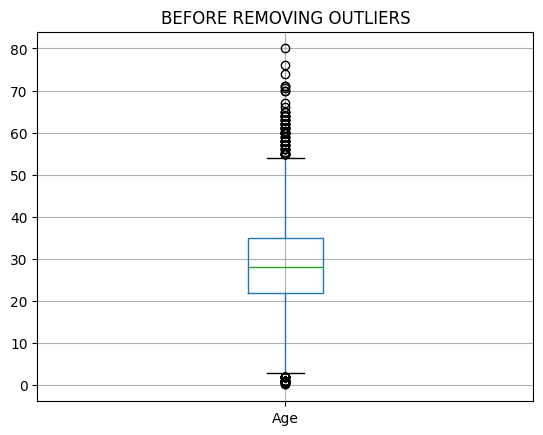

In [76]:
combined.boxplot(column=['Age'])
plt.title("BEFORE REMOVING OUTLIERS")


Text(0.5, 1.0, 'AFTER REMOVING OUTLIERS')

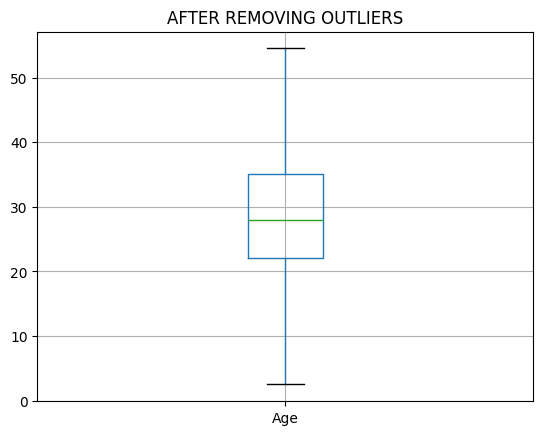

In [77]:
combined_capped.boxplot(column=['Age'])
plt.title("AFTER REMOVING OUTLIERS")

In [78]:
y=combined['Survived']
x=combined.drop(['Survived','Dataset'],axis=1)


In [79]:
y

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
1304,0.0
1305,0.0
1306,0.0
1307,0.0


In [80]:
x

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,True,False,True
1,2,1,38.0,1,0,71.2833,False,False,False
2,3,3,26.0,0,0,7.9250,False,False,True
3,4,1,35.0,1,0,53.1000,False,False,True
4,5,3,35.0,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...
1304,1305,3,28.0,0,0,8.0500,True,False,True
1305,1306,1,39.0,0,0,108.9000,False,False,False
1306,1307,3,38.5,0,0,7.2500,True,False,True
1307,1308,3,28.0,0,0,8.0500,True,False,True


In [83]:
numeric=combined.select_dtypes(include='number').columns

In [87]:
combined[numeric].corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.331493,-0.038354,0.025799,-0.055224,0.008942,0.031128
Survived,-0.331493,1.000000,-0.244686,-0.055862,-0.014375,0.054908,0.173786
Pclass,-0.038354,-0.244686,1.000000,-0.377908,0.060832,0.018322,-0.558683
Age,0.025799,-0.055862,-0.377908,1.000000,-0.189972,-0.125851,0.178182
SibSp,-0.055224,-0.014375,0.060832,-0.189972,1.000000,0.373587,0.160349
Parch,0.008942,0.054908,0.018322,-0.125851,0.373587,1.000000,0.221635
Fare,0.031128,0.173786,-0.558683,0.178182,0.160349,0.221635,1.000000


In [90]:
!pip install xgboost

In [91]:
import xgboost as xgb

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [95]:
from math import gamma
model_xgb=xgb.XGBClassifier(n_estimators=100,Learning_rate=0.1,gamma=100,reg_lambda=10)

In [97]:
model_xgb.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:08:57] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "Learning_rate" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(Learning_rate=0.1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=100, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, ...)

In [98]:
y_pred_train=model_xgb.predict(x_train)
y_pred_test=model_xgb.predict(x_test)

In [128]:
from sklearn.metrics import accuracy_score, log_loss,precision_score,recall_score

In [129]:
print("Training_accuracy",accuracy_score(y_train,y_pred_train))
print("Testing_accuracy",accuracy_score(y_test,y_pred_test))
print("Traing_logloss",log_loss(y_train,y_pred_train))
print("Testing_logloss",log_loss(y_test,y_pred_test))
print("Training_precision",precision_score(y_train,y_pred_train))
print("Testing_precision",precision_score(y_test,y_pred_test))
print("Training_recall",recall_score(y_train,y_pred_train))
print("Testing_recall",recall_score(y_test,y_pred_test))

Training_accuracy 0.9582059123343527
Testing_accuracy 0.8841463414634146
Traing_logloss 1.5064116095349678
Testing_logloss 4.175789112153816
Training_precision 0.9726027397260274
Testing_precision 0.85
Training_recall 0.8588709677419355
Testing_recall 0.723404255319149


In [103]:
from sklearn.model_selection import GridSearchCV

In [104]:
param_grid={
    "n_estimators":[100,200,300],
    "Learning_rate":[0.1,1,0.01],
    "gamma":[10,20,50],
    "reg_lambda":[10,20,50]

}

In [105]:
XGBModel=xgb.XGBClassifier()

In [108]:
grid_search=GridSearchCV(estimator=XGBModel,param_grid=param_grid,cv=5,scoring="accuracy")

In [109]:
grid_search.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:20:25] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "Learning_rate" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:20:25] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "Learning_rate" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:20:26] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "Learning_rate" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:20:26] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "Learning_rate" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:20:26] WARNING: /workspace/src/lea

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'Learning_rate': [0.1, 1, 0.01], 'gamma': [10, 20, 50],
                         'n_estimators': [100, 200, 300],
                         'reg_lambda': [10, 20, 50]},
             scoring='accuracy')

In [110]:
print("Best parameters",grid_search.best_params_)
print("Best score",grid_search.best_score_)

Best parameters {'Learning_rate': 0.1, 'gamma': 20, 'n_estimators': 100, 'reg_lambda': 10}
Best score 0.8532425152802237


In [111]:
best_model=grid_search.best_estimator_

In [112]:
y_pred_test=best_model.predict(x_test)
test_accuracy=accuracy_score(y_test,y_pred_test)
print("Test accuracy",test_accuracy)

Test accuracy 0.8292682926829268


In [113]:
import lightgbm as lgb

In [114]:
lgb_model=lgb.LGBMClassifier(n_estimators=100,learning_rate=0.1,max_depth=5)

In [115]:
lgb_model.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 248, number of negative: 733
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000237 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 497
[LightGBM] [Info] Number of data points in the train set: 981, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.252803 -> initscore=-1.083717
[LightGBM] [Info] Start training from score -1.083717
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(max_depth=5)

In [116]:
y_pred_train=lgb_model.predict(x_train)
y_pred_test=lgb_model.predict(x_test)

In [130]:
print("Training_accuracy",accuracy_score(y_train,y_pred_train))
print("Testing_accuracy",accuracy_score(y_test,y_pred_test))
print("Traing_logloss",log_loss(y_train,y_pred_train))
print("Testing_logloss",log_loss(y_test,y_pred_test))
print("Training_precision",precision_score(y_train,y_pred_train))
print("Testing_precision",precision_score(y_test,y_pred_test))
print("Training_recall",recall_score(y_train,y_pred_train))
print("Testing_recall",recall_score(y_test,y_pred_test))

Training_accuracy 0.9582059123343527
Testing_accuracy 0.8841463414634146
Traing_logloss 1.5064116095349678
Testing_logloss 4.175789112153816
Training_precision 0.9726027397260274
Testing_precision 0.85
Training_recall 0.8588709677419355
Testing_recall 0.723404255319149


In [118]:
param_grid={
    "n_estimators":[100,200,300],
    "learning_rate":[0.1,1,0.01],
    "max_depth":[5,10,15]
}

In [119]:
lgb_model=lgb.LGBMClassifier()

In [120]:
grid_search=GridSearchCV(estimator=lgb_model,param_grid=param_grid,cv=5,scoring="accuracy")

In [121]:
grid_search.fit(x_train,y_train)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.1, 1, 0.01],
                         'max_depth': [5, 10, 15],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [122]:
print("Best parameters",grid_search.best_params_)
print("Best score",grid_search.best_score_)

Best parameters {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best score 0.8725888324873097


In [124]:
best_model=grid_search.best_estimator_

In [125]:
y_pred_test=best_model.predict(x_test)
test_accuracy=accuracy_score(y_pred_test,y_test)
print("Test accuracy",test_accuracy)

Test accuracy 0.8841463414634146


In [126]:
#The optimized XGBoost model achieved a test accuracy of 0.8292682926829268. The optimized LightGBM model achieved a test accuracy of 0.8841463414634146.

#Based on these results, the LightGBM model performed better with a higher test accuracy.